# 03. PyTorch Computer Vision Exercises

The following is a collection of exercises based on computer vision fundamentals in PyTorch.

They're a bunch of fun.

You're going to get to write plenty of code!

## Resources

1. These exercises are based on [notebook 03 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/03_pytorch_computer_vision/). 
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/_PibmqpEyhA). 
  * **Note:** Going through these exercises took me just over 3 hours of solid coding, so you should expect around the same.
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Mon Feb 13 20:59:29 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 510.47.03    Driver Version: 510.47.03    CUDA Version: 11.6     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   59C    P0    28W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
# Import torch
import torch

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# TODO: Setup device agnostic code
device = 'cuda' if torch.cuda.is_available() else "cpu"
device

1.13.1+cu116


'cuda'

## 1. What are 3 areas in industry where computer vision is currently being used?

Agriculture: For plantation health, Autonomous Vehicles: Road finding and pedestrian finding, Security: Facial Recognition  

## 2. Search "what is overfitting in machine learning" and write down a sentence about what you find. 

Overfitting of a model is when a model has a capability high enough and train for long enough in the training data that it adjusts so strongly in the training data that when other data come in, test data for example, it performs poorly. 

## 3. Search "ways to prevent overfitting in machine learning", write down 3 of the things you find and a sentence about each. 
> **Note:** there are lots of these, so don't worry too much about all of them, just pick 3 and start with those.

1. Lower model capacity
2. Check for data representability
3. Cross-validation

## 4. Spend 20-minutes reading and clicking through the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

* Upload your own example image using the "upload" button on the website and see what happens in each layer of a CNN as your image passes through it.

## 5. Load the [`torchvision.datasets.MNIST()`](https://pytorch.org/vision/stable/generated/torchvision.datasets.MNIST.html#torchvision.datasets.MNIST) train and test datasets.

In [3]:
from pathlib import Path
from torchvision import datasets
from torchvision.transforms import ToTensor

DATA_FOLDER = Path("data")

train_data = datasets.MNIST(
    root=DATA_FOLDER,
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.MNIST(
    root=DATA_FOLDER,
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



## 6. Visualize at least 5 different samples of the MNIST training dataset.

In [4]:
class_names = train_data.class_to_idx
class_names

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

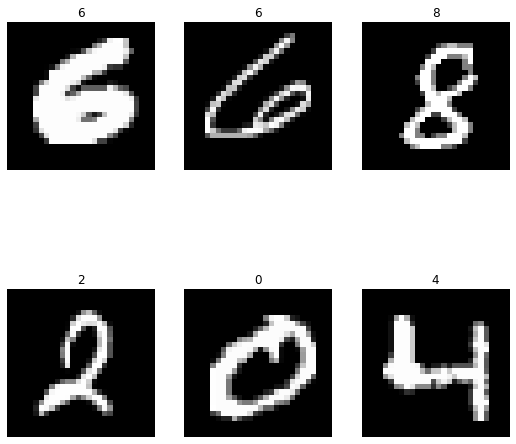

In [5]:
import matplotlib.pyplot as plt

torch.manual_seed(42)

train_data_len = len(train_data)

fig = plt.figure(figsize=(9, 9))
nrows, ncols = 2, 3
for i in range(1, nrows*ncols+1):
  image_idx = torch.randint(high=train_data_len, size=[1]).item()
  image, label = train_data[image_idx]

  fig.add_subplot(nrows, ncols, i)
  plt.imshow(image.squeeze(), cmap='gray')
  plt.title(label)
  plt.axis(False)

## 7. Turn the MNIST train and test datasets into dataloaders using `torch.utils.data.DataLoader`, set the `batch_size=32`.

In [6]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

## 8. Recreate `model_2` used in notebook 03 (the same model from the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/), also known as TinyVGG) capable of fitting on the MNIST dataset.

In [7]:
from torch import nn
class MNISTModelV0(nn.Module):

  def __init__(self, input_shape:int, hidden_units:int, output_features:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = (3, 3),
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = (2, 2),
                     stride = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = (3, 3),
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = (2, 2),
                     stride = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units,
                  out_features=output_features)
    )
  
  def forward(self, x):
    x = self.conv_block_1(x)
    print(f"X shape after conv_block_1: {x.shape}")
    x = self.conv_block_2(x)
    print(f"X shape after conv_block_2: {x.shape}")
    x = self.classifier(x)
    print(f"X shape after classifier: {x.shape}")
    return x

In [8]:
train_data[0][0].shape

torch.Size([1, 28, 28])

In [9]:
model_0 = MNISTModelV0(input_shape=train_data[0][0].shape[0],
                       hidden_units=10,
                       output_features=len(class_names)).to(device)
model_0

MNISTModelV0(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=10, out_features=10, bias=True)
  )
)

In [10]:
# Creating dummy data so I can know the in_features size for the model's classifier layer
torch.manual_seed(42)
dummy_image = torch.randn(size=train_data[0][0].shape, device=device)
dummy_image.shape

torch.Size([1, 28, 28])

In [11]:
model_0.eval()
model_0(dummy_image.unsqueeze(dim=0))

X shape after conv_block_1: torch.Size([1, 10, 14, 14])
X shape after conv_block_2: torch.Size([1, 10, 7, 7])


RuntimeError: ignored

Now I know that the final shape for the classifier should be 10 X 49 and I can fix it. So, I'll re-do the model's class below with the fixed values.

In [12]:
from torch import nn
class MNISTModelV0(nn.Module):

  def __init__(self, input_shape, hidden_units:int, output_features:int):
    super().__init__()
    self.conv_block_1 = nn.Sequential(
        nn.Conv2d(in_channels = input_shape,
                  out_channels = hidden_units,
                  kernel_size = (3, 3),
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = (2, 2),
                     stride = 2)
    )
    self.conv_block_2 = nn.Sequential(
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = (3, 3),
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.Conv2d(in_channels = hidden_units,
                  out_channels = hidden_units,
                  kernel_size = 3,
                  stride = 1,
                  padding = 1),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size = (2, 2),
                     stride = 2)
    )
    self.classifier = nn.Sequential(
        nn.Flatten(),
        nn.Linear(in_features=hidden_units*7*7,
                  out_features=output_features)
    )
  
  def forward(self, x):
    x = self.conv_block_1(x)
    x = self.conv_block_2(x)
    x = self.classifier(x)
    return x

In [13]:
model_0 = MNISTModelV0(input_shape=train_data[0][0].shape[0],
                       hidden_units=10,
                       output_features=len(class_names)).to(device)
model_0

MNISTModelV0(
  (conv_block_1): Sequential(
    (0): Conv2d(1, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (conv_block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=(2, 2), stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=490, out_features=10, bias=True)
  )
)

In [14]:
model_0(dummy_image.unsqueeze(dim=0))

tensor([[ 0.0314, -0.0745,  0.0847, -0.0518,  0.0127,  0.0252,  0.0188, -0.0039,
         -0.0169, -0.0039]], device='cuda:0', grad_fn=<AddmmBackward0>)

## 9. Train the model you built in exercise 8. for 5 epochs on CPU and GPU and see how long it takes on each.

In [15]:
def train_model(model, loss_fn, optimizer, data_loader, device: torch.device = 'cpu'):
  """
  Perform the training step for every batch of a data_loader
  Returns the loss
  """

  my_model = model.to(device)

  my_model.train()

  total_loss = 0

  for X, y in data_loader:
    X, y = X.to(device), y.to(device)

    y_train_logits = my_model(X)
    y_train_loss = loss_fn(y_train_logits, y)

    optimizer.zero_grad()

    y_train_loss.backward()

    optimizer.step()

    total_loss += y_train_loss
  
  return total_loss/len(data_loader)

In [16]:
def test_model(model, loss_fn, data_loader, device: torch.device = 'cpu'):
  """
  Perform the test step for every batch of a data_loader
  Returns the loss
  """

  if next(model.parameters()).device != device:
    my_model = model.to(device)
  else:
    my_model = model

  my_model.eval()

  total_loss = 0
  with torch.inference_mode():
    for X, y in data_loader:
      X, y = X.to(device), y.to(device)

      y_test_logits = my_model(X)
      y_test_loss = loss_fn(y_test_logits, y)

      total_loss += y_test_loss
  
  return total_loss/len(data_loader)

In [17]:
from tqdm.auto import tqdm

def train_test_model_on_device(model, optimizer, loss_fn, train_dataloader,
                               test_dataloader, 
                               device: torch.device = 'cpu',
                               epochs=5, print_loss_every:int = 10):
  
  if next(model.parameters()).device != device:
    my_model = model.to(device)
  else:
    my_model = model
  
  for epoch in tqdm(range(epochs)):
    
    train_loss = train_model(model=model, optimizer=optimizer, loss_fn=loss_fn, 
                data_loader=train_dataloader, device=device)
    
    test_loss = test_model(model=model, loss_fn=loss_fn, data_loader=test_dataloader,
                           device=device)

    if print_loss_every > 0:
      if epoch % print_loss_every == 0:
        print(f"Epoch: {epoch} | Train loss: {train_loss:.4f} | Test loss: {test_loss:.4f}")

In [18]:
from timeit import default_timer as timer

def time_model_train_test_on_device(model, optimizer, loss_fn, train_dataloader,
                                    test_dataloader, device, epochs):
  
  PRINT_EVERY = 1
  start_time = timer()

  train_test_model_on_device(model=model, optimizer=optimizer, loss_fn=loss_fn,
                           train_dataloader=train_dataloader,
                           test_dataloader=test_dataloader, 
                           device=device, print_loss_every=PRINT_EVERY, epochs=epochs)

  end_time = timer()

  return end_time-start_time

In [19]:
def get_optimizer_and_loss_fn(model, lr):
  loss_fn = nn.CrossEntropyLoss()
  optimizer = torch.optim.SGD(params=model.parameters(), lr=lr)
  return optimizer, loss_fn

def get_base_model(input_shape, hidden_units, output_features):
  model = MNISTModelV0(input_shape=input_shape,
                       hidden_units=hidden_units,
                       output_features=output_features)
  return model

In [20]:
devices = ['cpu', 'cuda']
trained_models = dict()
trained_models_times = dict()

EPOCHS = 5
LR = 0.03

for device in devices:
  torch.manual_seed(42)
  torch.cuda.manual_seed(42)

  model = get_base_model(input_shape=train_data[0][0].shape[0], hidden_units=10, 
                         output_features=len(class_names))
  optimizer, loss_fn = get_optimizer_and_loss_fn(model, lr=LR)

  train_time = time_model_train_test_on_device(model, optimizer, loss_fn,
                                               train_dataloader, test_dataloader,
                                               device=device, epochs=EPOCHS)
  
  trained_models[device] = model
  trained_models_times[device] = train_time

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.4889 | Test loss: 0.0991
Epoch: 1 | Train loss: 0.0909 | Test loss: 0.0577
Epoch: 2 | Train loss: 0.0704 | Test loss: 0.0580
Epoch: 3 | Train loss: 0.0593 | Test loss: 0.0413
Epoch: 4 | Train loss: 0.0517 | Test loss: 0.0419


  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.4888 | Test loss: 0.0993
Epoch: 1 | Train loss: 0.0911 | Test loss: 0.0559
Epoch: 2 | Train loss: 0.0704 | Test loss: 0.0582
Epoch: 3 | Train loss: 0.0596 | Test loss: 0.0431
Epoch: 4 | Train loss: 0.0518 | Test loss: 0.0401


In [21]:
trained_models_times

{'cpu': 199.88412830800002, 'cuda': 56.97277812599998}

The model that trained on cuda device was about 3 times faster

## 10. Make predictions using your trained model and visualize at least 5 of them comparing the prediciton to the target label.

In [22]:
def make_predictions(model: torch.nn.Module,
                     data: list,
                     device: torch.device = device):
  pred_probs = []
  model.to(device)
  model.eval()
  with torch.inference_mode():
    for sample in data:
      sample = torch.unsqueeze(sample, dim=0).to(device)

      # O modelo tem logits como output
      pred_logit = model(sample)

      # logit para probabilidade
      pred_prob = torch.softmax(pred_logit.squeeze(), dim=0)

      pred_probs.append(pred_prob.cpu())

  # Concatena tudo na lista em um único tensor
  return torch.stack(pred_probs)

In [23]:
import random 
# random.seed(42)
test_samples = []
test_labels = []
NUM_SAMPLES = 9
for sample, label in random.sample(list(test_data), k=NUM_SAMPLES):
  test_samples.append(sample)
  test_labels.append(label)

test_samples[0].shape

torch.Size([1, 28, 28])

In [24]:
model = trained_models['cuda'].to(device)
pred_probs = make_predictions(model=model,
                              data=test_samples)

In [25]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 2, 9, 2, 4, 3, 6, 0, 0])

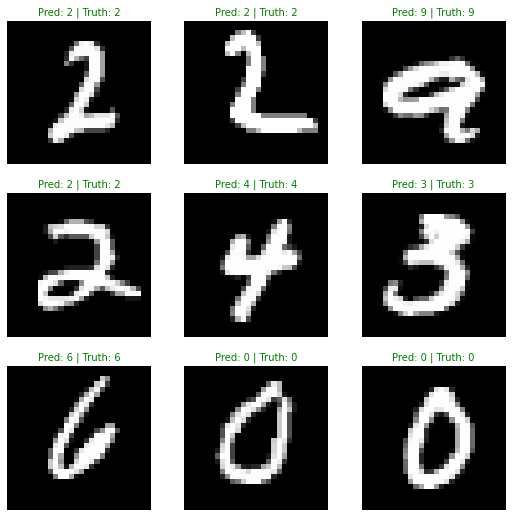

In [26]:
# Plotando as predições
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, sample in enumerate(test_samples):
  # Um subplot para cada amostra
  plt.subplot(nrows, ncols, i+1)

  plt.imshow(sample.squeeze(), cmap='gray')
  pred_label = pred_classes[i]

  truth_label = test_labels[i]

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')
  
  plt.axis(False)

## 11. Plot a confusion matrix comparing your model's predictions to the truth labels.

In [27]:
from tqdm.auto import tqdm

y_preds = []
target_y = []
model.eval()
with torch.inference_mode():
  for X, y in tqdm(test_dataloader, desc="Realizando predições...."):
    X, y = X.to(device), y.to(device)
    y_logit = model(X)
    y_pred = torch.softmax(y_logit.squeeze(), dim=0).argmax(dim=1)
    y_preds.append(y_pred.to('cpu') )
    target_y.append(y.to('cpu'))

y_pred_tensor = torch.cat(y_preds)
target_y_tensor = torch.cat(target_y)
y_pred_tensor[:10], target_y_tensor[:10]

Realizando predições....:   0%|          | 0/313 [00:00<?, ?it/s]

(tensor([8, 3, 0, 8, 6, 7, 3, 5, 2, 1]),
 tensor([8, 3, 0, 8, 6, 7, 3, 5, 2, 1]))

In [28]:
# Vê se os pacotes necessários estão instalados, se não, instala eles
try:
  import torchmetrics, mlxtend
  ml_version = mlxtend.__version__
  print(f"mlxtend version: {ml_version}")
  assert int(ml_version.split(".")[1]) >= 19, "mlxtend version deve ser 0.19.0 ou maior"
except:
  !pip install -q torchmetrics -U mlxtend
  import torchmetrics, mlxtend
  print(f"mlxtend version: {mlxtend.__version__}")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 517.2/517.2 KB 15.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 72.6 MB/s eta 0:00:00
mlxtend version: 0.21.0


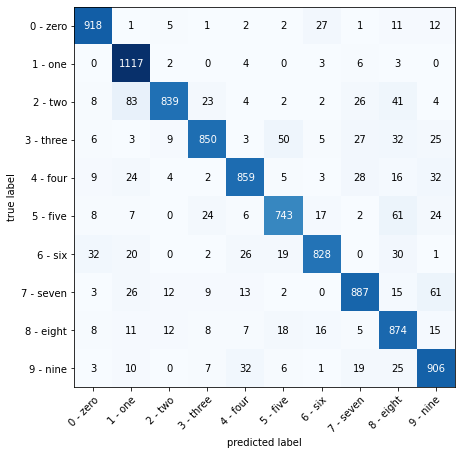

In [29]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Configurando instância da matrix de confusão
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor, 
                         target=target_y_tensor)

# 3. Plotando a matrix de confusão
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(),
    class_names=class_names,
    figsize=(10, 7)
)

## 12. Create a random tensor of shape `[1, 3, 64, 64]` and pass it through a `nn.Conv2d()` layer with various hyperparameter settings (these can be any settings you choose), what do you notice if the `kernel_size` parameter goes up and down?

In [32]:
torch.manual_seed(42)
random_tensor = torch.randn(1, 3, 64, 64)
random_tensor.shape

torch.Size([1, 3, 64, 64])

In [44]:
kernel_sizes = [1, 3, 5, 7]
strides = [1] #[1, 2, 3]
paddings = [0] #[0, 1, 2, 3]

for kernel in kernel_sizes:
  print(f"Kernel: {kernel}")
  for stride in strides:
    print(f"\tStride: {stride}")
    for padding in paddings:
      print(f"\t\tPadding: {padding}")
      my_conv_layer = nn.Conv2d(in_channels=3, out_channels=3,
                          kernel_size=kernel, stride=stride, padding=padding)

      result = my_conv_layer(random_tensor)

      print(f"\t\t\t Result shape: {result.shape}")

Kernel: 1
	Stride: 1
		Padding: 0
			 Result shape: torch.Size([1, 3, 64, 64])
Kernel: 3
	Stride: 1
		Padding: 0
			 Result shape: torch.Size([1, 3, 62, 62])
Kernel: 5
	Stride: 1
		Padding: 0
			 Result shape: torch.Size([1, 3, 60, 60])
Kernel: 7
	Stride: 1
		Padding: 0
			 Result shape: torch.Size([1, 3, 58, 58])


Bigger the kernel size, smaller the result shape.

## 13. Use a model similar to the trained `model_2` from notebook 03 to make predictions on the test [`torchvision.datasets.FashionMNIST`](https://pytorch.org/vision/main/generated/torchvision.datasets.FashionMNIST.html) dataset. 
* Then plot some predictions where the model was wrong alongside what the label of the image should've been. 
* After visualing these predictions do you think it's more of a modelling error or a data error? 
* As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

In [77]:
from torchvision import datasets
from torchvision.transforms import ToTensor

train_data = datasets.FashionMNIST(
    root=DATA_FOLDER,
    train=True,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

test_data = datasets.FashionMNIST(
    root=DATA_FOLDER,
    train=False,
    download=True,
    transform=ToTensor(),
    target_transform=None
)

In [48]:
class_names = train_data.class_to_idx
class_names

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [78]:
train_dataloader = DataLoader(train_data, batch_size=32, shuffle=True)
test_dataloader = DataLoader(test_data, batch_size=32, shuffle=True)

In [79]:
devices = ['cuda']
trained_models = dict()
trained_models_times = dict()

EPOCHS = 10
LR = 0.1

for device in devices:
  torch.manual_seed(42)
  torch.cuda.manual_seed(42)

  model = get_base_model(input_shape=train_data[0][0].shape[0], hidden_units=10, 
                         output_features=len(class_names))
  optimizer, loss_fn = get_optimizer_and_loss_fn(model, lr=LR)

  train_time = time_model_train_test_on_device(model, optimizer, loss_fn,
                                               train_dataloader, test_dataloader,
                                               device=device, epochs=EPOCHS)
  
  trained_models[device] = model
  trained_models_times[device] = train_time

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0 | Train loss: 0.5783 | Test loss: 0.3866
Epoch: 1 | Train loss: 0.3570 | Test loss: 0.3873
Epoch: 2 | Train loss: 0.3190 | Test loss: 0.3177
Epoch: 3 | Train loss: 0.2998 | Test loss: 0.3198
Epoch: 4 | Train loss: 0.2847 | Test loss: 0.3043
Epoch: 5 | Train loss: 0.2754 | Test loss: 0.3090
Epoch: 6 | Train loss: 0.2672 | Test loss: 0.2975
Epoch: 7 | Train loss: 0.2590 | Test loss: 0.2937
Epoch: 8 | Train loss: 0.2535 | Test loss: 0.2937
Epoch: 9 | Train loss: 0.2492 | Test loss: 0.2827


In [80]:
test_data.data = test_data.data.to(torch.float32)

In [81]:
model = trained_models['cuda'].to(device)
pred_probs = make_predictions(model=model,
                              data=test_data.data.unsqueeze(1))

In [82]:
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([9, 2, 1,  ..., 8, 1, 5])

In [84]:
wrong_predictions = list()

for image_idx in range(len(test_data.data)):
  if pred_classes[image_idx] != test_data.targets[image_idx]:
    wrong_predictions.append(image_idx)

In [85]:
len(wrong_predictions)

2374

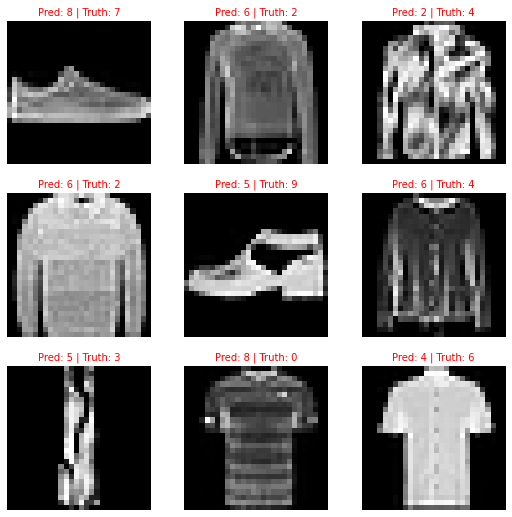

In [92]:
# Plotando as predições
plt.figure(figsize=(9, 9))
nrows = 3
ncols = 3
for i, image_idx in enumerate(wrong_predictions[:9]):
  # Um subplot para cada amostra
  plt.subplot(nrows, ncols, i+1)

  sample = test_data.data[image_idx]
  plt.imshow(sample.squeeze(), cmap='gray')
  pred_label = pred_classes[image_idx].item()

  truth_label = test_data.targets[image_idx].item()

  title_text = f"Pred: {pred_label} | Truth: {truth_label}"

  if pred_label == truth_label:
    plt.title(title_text, fontsize=10, c='g')
  else:
    plt.title(title_text, fontsize=10, c='r')
  
  plt.axis(False)

In [93]:
class_names

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

Some of the image's prediction labels are equal to labels that the image really could have. As in predicting for Shirt but really being a Pullover or a Coat. This labeling issue has, for sure, some effect on the model performance. 